<a href="https://colab.research.google.com/github/zhaocaiQ/machine_learning_study/blob/master/9_2_IMDB_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0(24%EA%B0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from tensorflow.keras.datasets import imdb
 #num_words매개변수를 설정하여 자주 등장하는 단어의 사용개수를 지정할 수 있음.
 (train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [4]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


#### 훈련세트 준비

In [5]:
from sklearn.model_selection import train_test_split
#훈련세트와 검증세트로 나누기
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

#### 훈련세트에 있는 리뷰 길이의 평균과 중간 값 구함.

In [6]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [7]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


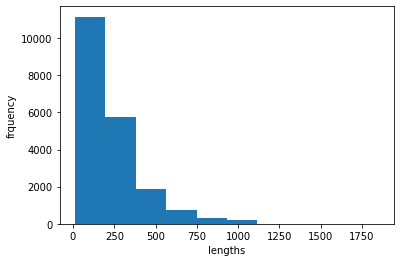

In [8]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frquency')
plt.show()

#### 리뷰 길이를 100으로 잘라냄, 100미만인 경우 패딩(0)으로 채움

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [10]:
print(train_seq.shape)

(20000, 100)


#### 리뷰를 앞부분을 잘랐는지, 뒷부분을 잘랐는지 확인

##### 앞부분을 자른걸 알 수 있음

In [11]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [12]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


#### 앞부분에 패딩으로 채움
##### 시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰영향을 미치므로

In [13]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [14]:
val_seq = pad_sequences(val_input, maxlen=100)

## 순환신경망 만들기

In [16]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

#### 정숫값 원-핫인코딩으로 변경

In [17]:
train_oh = keras.utils.to_categorical(train_seq)

In [19]:
print(train_oh.shape)

(20000, 100, 500)


In [20]:
val_oh = keras.utils.to_categorical(val_seq)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


## 모델훈련하기

In [22]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.6969 - accuracy: 0.5037 - val_loss: 0.6945 - val_accuracy: 0.5092
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6930 - accuracy: 0.5167 - val_loss: 0.6923 - val_accuracy: 0.5192
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6906 - accuracy: 0.5267 - val_loss: 0.6910 - val_accuracy: 0.5234
Epoch 4/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6888 - accuracy: 0.5372 - val_loss: 0.6898 - val_accuracy: 0.5326
Epoch 5/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6871 - accuracy: 0.5470 - val_loss: 0.6886 - val_accuracy: 0.5396
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6853 - accuracy: 0.5547 - val_loss: 0.6875 - val_accuracy: 0.5478
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6835 - accuracy: 0.5597 - val_loss: 0.6863 - val_ac

In [25]:
print(early_stopping_cb.stopped_epoch)

43


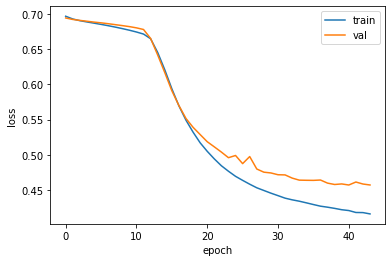

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [24]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


## 단어임베딩

In [26]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 26ms/step - loss: 0.6786 - accuracy: 0.5733 - val_loss: 0.6558 - val_accuracy: 0.6336
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6332 - accuracy: 0.6715 - val_loss: 0.6172 - val_accuracy: 0.6934
Epoch 3/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5977 - accuracy: 0.7196 - val_loss: 0.5923 - val_accuracy: 0.7218
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5702 - accuracy: 0.7448 - val_loss: 0.5696 - val_accuracy: 0.7408
Epoch 5/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5464 - accuracy: 0.7624 - val_loss: 0.5476 - val_accuracy: 0.7596
Epoch 6/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5271 - accuracy: 0.7724 - val_loss: 0.5301 - val_accuracy: 0.7656
Epoch 7/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5097 - accuracy: 0.7822 - val_loss: 0.5223 - val_accuracy:

In [30]:
print(early_stopping_cb.stopped_epoch)

26


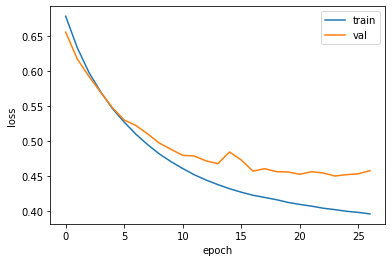

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()